# Pandas Introduction

This notebook is a modified version of Greg Reda's notebook on Pandas.  See his original [here](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/).

* Pandas documentation is [here](https://pandas.pydata.org/pandas-docs/stable/)
* Cheat sheet [here](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
* More complete cheat sheet (on blackboard)
* It is always good to have a [cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html)
* applying functions more quickly (use [swifter](https://github.com/jmcarpenter2/swifter))


# Data Structures

pandas introduces two new data structures to Python - Series and DataFrame, both of which are built on top of NumPy (this means it's fast).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_columns', 50)
%matplotlib inline


# Series

A Series is a one-dimensional object similar to an array, list, or column in a table. It will assign a labeled index to each item in the Series. By default, each item will receive an index label from 0 to N, where N is the length of the Series minus one.


In [2]:
# create a Series with an arbitrary list
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'])
s

0                7
1       Heisenberg
2             3.14
3      -1789710578
4    Happy Eating!
dtype: object

Alternatively, you can specify an index to use when creating the Series.

In [3]:
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'],
              index=['A', 'Z', 'C', 'Y', 'E'])
s

A                7
Z       Heisenberg
C             3.14
Y      -1789710578
E    Happy Eating!
dtype: object

## You can now do typical Python

In [4]:
s['A']

7

In [5]:
for item in s:
    print(item)

7
Heisenberg
3.14
-1789710578
Happy Eating!


## Constructing a series from a dictionary

The Series constructor can convert a dictonary as well, using the keys of the dictionary as its index.

In [6]:
d = {'Chicago': 1000, 'New York': 1300, 'Portland': 900, 'San Francisco': 1100,
     'Austin': 450, 'Boston': None}
cities = pd.Series(d)
cities

Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
Austin            450.0
Boston              NaN
dtype: float64

## Selecting items from a series

You can use the index to select specific items from the Series ...

In [7]:
cities['Chicago']

1000.0

In [8]:
cities[['Chicago', 'Portland', 'San Francisco']]

Chicago          1000.0
Portland          900.0
San Francisco    1100.0
dtype: float64

Or you can use boolean indexing for selection.

In [9]:
cities[cities < 1000]

Portland    900.0
Austin      450.0
dtype: float64

That last one might be a little weird, so let's make it more clear - cities < 1000 returns a Series of True/False values, which we then pass to our Series cities, returning the corresponding True items.

In [11]:
less_than_1000 = cities < 1000
print(less_than_1000)
print('\n')
print(cities[less_than_1000])

Chicago          False
New York         False
Portland          True
San Francisco    False
Austin            True
Boston           False
dtype: bool


Portland    900.0
Austin      450.0
dtype: float64


## Series are mutable

In [12]:
# changing based on the index
print('Old value:', cities['Chicago'])
cities['Chicago'] = 1400
print('New value:', cities['Chicago'])

Old value: 1000.0
New value: 1400.0


In [14]:
# changing values using boolean logic
print(cities[cities < 1000])
print('\n')
cities[cities < 1000] = 750

print(cities[cities < 1000])

Portland    900.0
Austin      450.0
dtype: float64


Portland    750.0
Austin      750.0
dtype: float64


What if you aren't sure whether an item is in the Series? You can check using idiomatic Python.

In [15]:
print('Seattle' in cities)
print('San Francisco' in cities)

False
True


## math on series

In [17]:
# divide city values by 3
cities / 3

Chicago          466.666667
New York         433.333333
Portland         250.000000
San Francisco    366.666667
Austin           250.000000
Boston                  NaN
dtype: float64

In [18]:
# square city values
np.square(cities)

Chicago          1960000.0
New York         1690000.0
Portland          562500.0
San Francisco    1210000.0
Austin            562500.0
Boston                 NaN
dtype: float64

You can add two Series together, which returns a union of the two Series with the addition occurring on the shared index values. Values on either Series that did not have a shared index will produce a NULL/NaN (not a number).

In [19]:
print(cities[['Chicago', 'New York', 'Portland']])
print('\n')
print(cities[['Austin', 'New York']])
print('\n')
print(cities[['Chicago', 'New York', 'Portland']] + cities[['Austin', 'New York']])

Chicago     1400.0
New York    1300.0
Portland     750.0
dtype: float64


Austin       750.0
New York    1300.0
dtype: float64


Austin         NaN
Chicago        NaN
New York    2600.0
Portland       NaN
dtype: float64




Notice that because Austin, Chicago, and Portland were not found in both Series, they were returned with NULL/NaN values.

NULL checking can be performed with isnull and notnull.


In [20]:
# returns a boolean series indicating which values aren't NULL
cities.notnull()

Chicago           True
New York          True
Portland          True
San Francisco     True
Austin            True
Boston           False
dtype: bool

In [21]:
# use boolean logic to grab the NULL cities
print(cities.isnull())
print('\n')
print(cities[cities.isnull()])

Chicago          False
New York         False
Portland         False
San Francisco    False
Austin           False
Boston            True
dtype: bool


Boston   NaN
dtype: float64


# Data Frames
A DataFrame is a tablular data structure comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can also think of a DataFrame as a group of Series objects that share an index (the column names).

## Constructing a DataFrame

To construct a DataFrame out of common Python data structures, we can pass a dictionary of lists to the DataFrame constructor.

Using the columns parameter allows us to tell the constructor how we'd like the columns ordered. By default, the DataFrame constructor will order the columns alphabetically (though this isn't the case when reading from a file - more on that next).

In [10]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
football

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


## Viewing information in a data table

In [11]:
football.head()

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5


In [12]:
football.tail()

,year,team,wins,losses
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


In [21]:
football.shape

(8, 4)

In [28]:
football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    8 non-null      int64 
 1   team    8 non-null      object
 2   wins    8 non-null      int64 
 3   losses  8 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 384.0+ bytes


In [18]:
football.describe()

,year,wins,losses
count,8.000000,8.000000,8.000000
mean,2011.125000,9.375000,6.625000
std,0.834523,3.377975,3.377975
min,2010.000000,4.000000,1.000000
25%,2010.750000,7.500000,5.000000
50%,2011.000000,10.000000,6.000000
75%,2012.000000,11.000000,8.500000
max,2012.000000,15.000000,12.000000


In [14]:
football.index

RangeIndex(start=0, stop=8, step=1)

In [16]:
football.columns

Index(['year', 'team', 'wins', 'losses'], dtype='object')

# Plotting from Pandas 

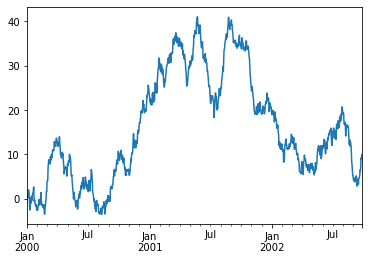

In [19]:
import matplotlib.pyplot as plt

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

In [31]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)


df = df.cumsum()
df.head()

,A,B,C,D
2000-01-01,-1.996798,-0.801325,1.099778,0.050060
2000-01-02,-1.569121,0.223426,1.329524,1.315663
2000-01-03,-1.807717,-1.052968,-0.063337,2.432636
2000-01-04,-1.756308,0.405185,0.450128,1.088023
2000-01-05,-0.123727,1.332115,0.371532,-0.306712


<Figure size 432x288 with 0 Axes>

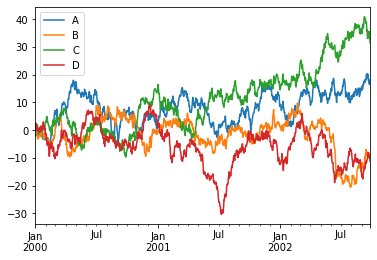

In [32]:
plt.figure();
df.plot();
plt.legend(loc='best');

<AxesSubplot:>

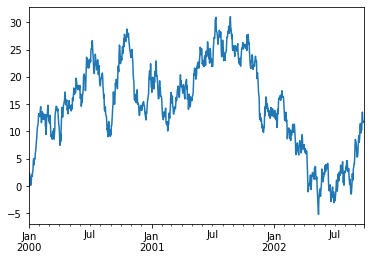

In [23]:
df['A'].plot()

<AxesSubplot:>

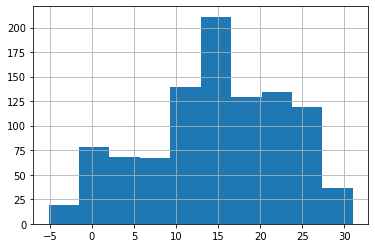

In [24]:
df['A'].hist()

array([[<AxesSubplot:xlabel='A', ylabel='A'>,
        <AxesSubplot:xlabel='B', ylabel='A'>,
        <AxesSubplot:xlabel='C', ylabel='A'>,
        <AxesSubplot:xlabel='D', ylabel='A'>],
       [<AxesSubplot:xlabel='A', ylabel='B'>,
        <AxesSubplot:xlabel='B', ylabel='B'>,
        <AxesSubplot:xlabel='C', ylabel='B'>,
        <AxesSubplot:xlabel='D', ylabel='B'>],
       [<AxesSubplot:xlabel='A', ylabel='C'>,
        <AxesSubplot:xlabel='B', ylabel='C'>,
        <AxesSubplot:xlabel='C', ylabel='C'>,
        <AxesSubplot:xlabel='D', ylabel='C'>],
       [<AxesSubplot:xlabel='A', ylabel='D'>,
        <AxesSubplot:xlabel='B', ylabel='D'>,
        <AxesSubplot:xlabel='C', ylabel='D'>,
        <AxesSubplot:xlabel='D', ylabel='D'>]], dtype=object)

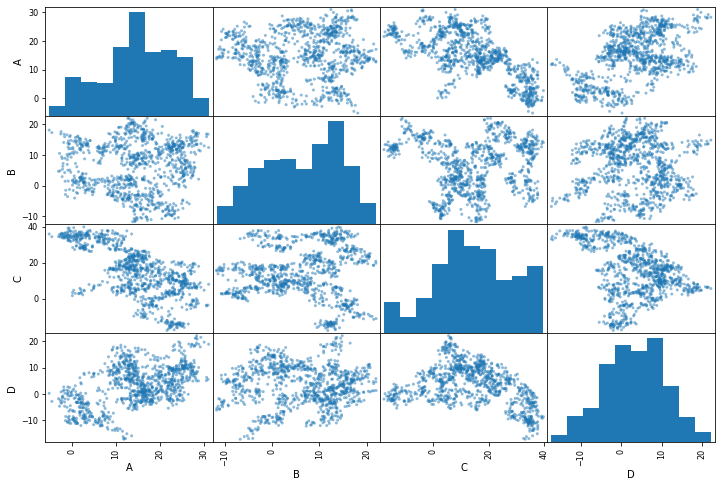

In [27]:
pd.plotting.scatter_matrix(df, figsize=(12,8))

In [25]:
df.corr()  # Correlation matrix

,A,B,C,D
A,1.000000,0.014767,-0.681459,0.508199
B,0.014767,1.000000,0.010854,0.010869
C,-0.681459,0.010854,1.000000,-0.364974
D,0.508199,0.010869,-0.364974,1.000000


# Applying Functions

In [35]:
data = {'born': [1960, 1955, 1970, 1968, 1980, 2000, 1995, 2004],
        'name': ['Jill', 'John', 'Bill', 'Tim', 'Mary', 'Mark', 'Jane', 'Steve'],
        'height': [60, 72, 69, 76, 65, 68, 68, 73]}
people = pd.DataFrame(data, columns=['born', 'name', 'height'])
people

,born,name,height
0,1960,Jill,60
1,1955,John,72
2,1970,Bill,69
3,1968,Tim,76
4,1980,Mary,65
5,2000,Mark,68
6,1995,Jane,68
7,2004,Steve,73


convert inches to centimeter centimeter = 2.54 inches

In [44]:
people['height_in_cm'] = people['height'].map(lambda x: x*2.54)
people

,born,name,height,height_in_cm
0,1960,Jill,60,152.40
1,1955,John,72,182.88
2,1970,Bill,69,175.26
3,1968,Tim,76,193.04
4,1980,Mary,65,165.10
5,2000,Mark,68,172.72
6,1995,Jane,68,172.72
7,2004,Steve,73,185.42


In [45]:
def cm_to_mm(x):
    return x * 10

people['hight_in_mm']= people['height_in_cm'].apply(cm_to_mm)
people

,born,name,height,height_in_cm,hight_in_mm
0,1960,Jill,60,152.40,1524.0
1,1955,John,72,182.88,1828.8
2,1970,Bill,69,175.26,1752.6
3,1968,Tim,76,193.04,1930.4
4,1980,Mary,65,165.10,1651.0
5,2000,Mark,68,172.72,1727.2
6,1995,Jane,68,172.72,1727.2
7,2004,Steve,73,185.42,1854.2
